# Part 1

The dataset [framingham_heart_disease.csv](https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction) contains data about 4238 people, both males and females, and 15 data points for each person.
The purpose of this dataset is to predict early prognosis of cardiovascular diseases.
The columns are:
* male - binary variable which indicates if the person is male or female.
* age - numerical value indicating the age of the person.
* education - numerical variable indicating number of education years the person have (unknown w.r.t what?), no further information provided.
* currentSmoker - binary variable indicating if the person is currently smoking.
* cigsPerDay - numerical variable indicating how many cigarates the person is smoking if at all.
* BPMeds - binary variable indicating if the person is currently taking blood pressure medications.
* prevalentStroke - binary variable indicating if the person is had a stroke previously.
* prevalentHyp - binary variable indicating if the person had high blood pressure issues.
* diabetes - binary variable indicating if the person has diabetes.
* totChol - numerical variable indicating total amount of cholesterol in this person's blood.
* sysBP - numerical variable indicating this person's systolic blood pressure (pressure during beats).
* diaBP - numerical variable indicating this person's diastolic blood pressure in the arteries (pressure between beats).
* BMI - numerical variable indicating this person's BMI.
* heartRate - numerical variable indicating this person's heart rate per minute.
* glucose - numerical variable indicating this person's glucose level in the blood.
* TenYearCHD - binary variable indicating this person's 10-year risk of coronary heart disease (to be predicted).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [9]:
df = pd.read_csv('framingham_heart_disease.csv')

In [4]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## Checking which columns has null values

In [54]:
df.isna().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [59]:
# Droping null values by all columns
df.dropna(inplace=True)

In [60]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


## Numerical variables analysis

In [61]:
num_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for col in df.columns:
    if col in num_cols:
        print(df[col].describe())
        print('\n')

count    3656.000000
mean       49.557440
std         8.561133
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


count    3656.000000
mean        9.022155
std        11.918869
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64


count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64


count    3656.000000
mean      132.368025
std        22.092444
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64


count    3656.000000
mean       82.912062
std        11.974825
min        48.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: diaBP, dtype: float64


count

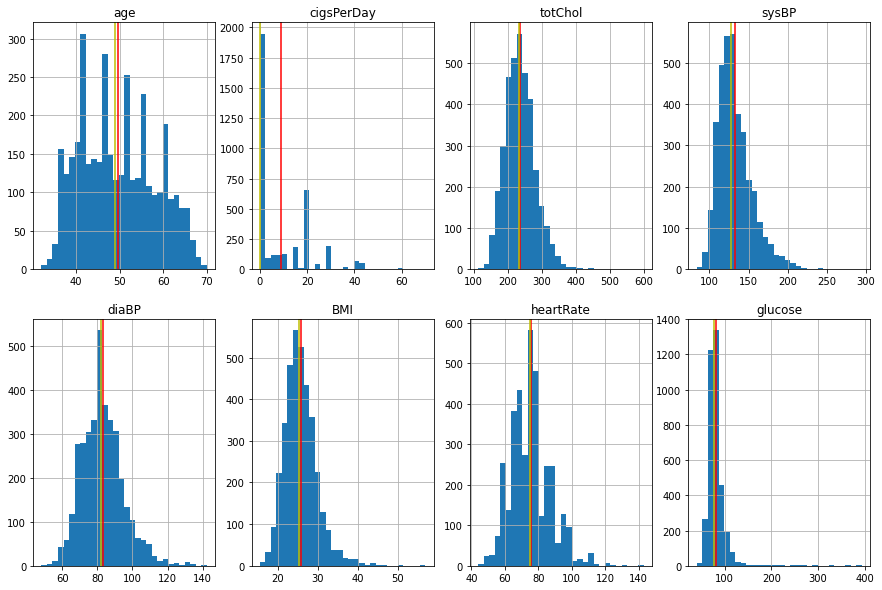

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
counter = 0
for col in df.columns:
    if col in num_cols:
        ax_row = 0 if counter < 4 else 1
        # Plotting histogram per column
        
        df[col].hist(ax=axes[ax_row, counter%4], bins=30)
        axes[ax_row, counter%4].set_title(col)
        
        # Adding mean and median as verical lines to each histogram
        axes[ax_row, counter%4].axvline(df[col].mean(), color='r')
        axes[ax_row, counter%4].axvline(df[col].median(), color='y')
    
        counter += 1

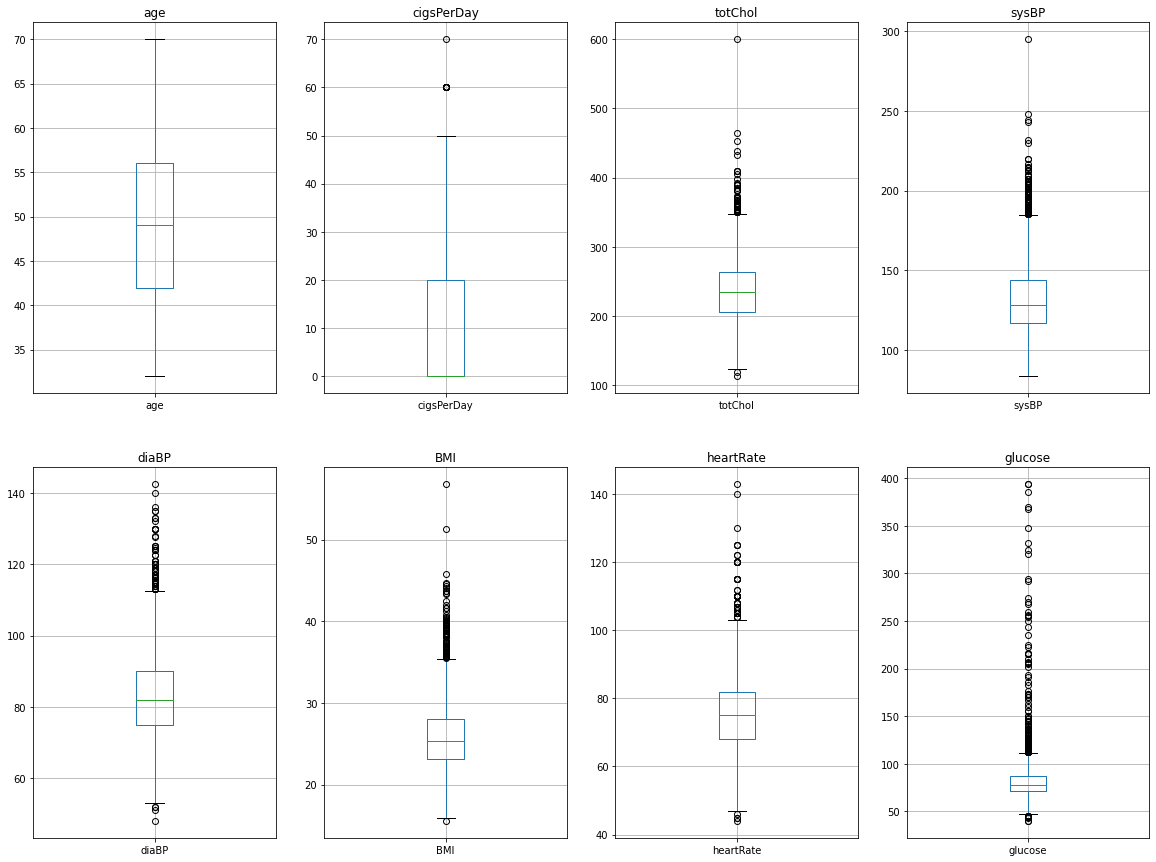

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
counter = 0
for col in df.columns:
    if col in num_cols:
        ax_row = 0 if counter < 4 else 1
        df.boxplot(column=[col], ax=axes[ax_row, counter%4])
        axes[ax_row, counter%4].set_title(col)
        counter += 1

## Observations
* We noticed that `glucose1` and `BMI` columns has sort of heavy tail distibution
* We also see that most of the numerical variables has many outliers to be considered later in the analysis.

## Categorical and binary variables analysis

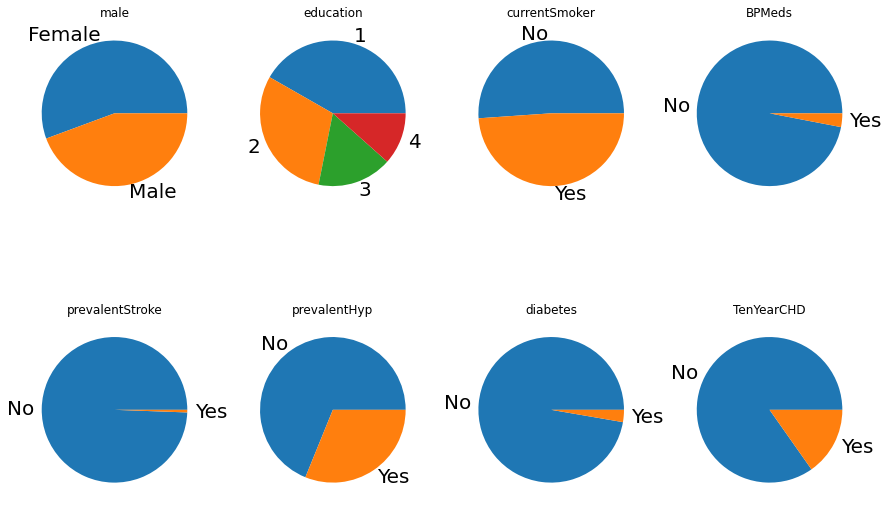

In [127]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))
labels_per_col = {'male': ['Female', 'Male'], 'currentSmoker': ['No', 'Yes'], 'BPMeds': ['No', 'Yes'],
                 'prevalentStroke': ['No', 'Yes'], 'prevalentHyp': ['No', 'Yes'], 
                  'diabetes': ['No', 'Yes'], 'TenYearCHD': ['No', 'Yes'], 'education': [1,2,3,4]}
counter = 0
for col in df.columns:
    if col not in num_cols:
        ax_row = 0 if counter < 4 else 1
        # Plotting pie per column
        df.groupby(col).size().plot(kind='pie', textprops={'fontsize': 20}, ax=axes[ax_row, counter%4],
                                    labels=labels_per_col[col])
        axes[ax_row, counter%4].set_title(col)
        axes[ax_row, counter%4].set_ylabel('')
    
        counter += 1
plt.show()

## Observations
* Since the column TenYearCHD is the column to be predicted we can see that there is a class imbalance that needs to be taken into account when analysing and training models.

# First Experimental question - Does Glucose (X) influence on BMI (Y)

let's make a graph to have a "feel":

<AxesSubplot:xlabel='glucose', ylabel='BMI'>

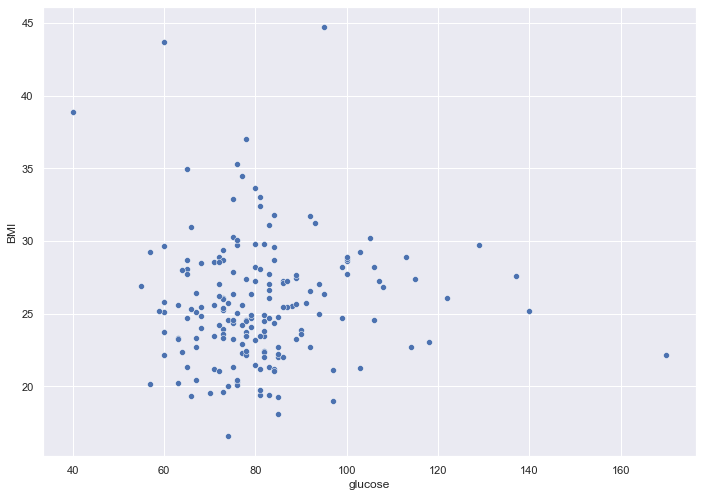

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_sample = df.sample(200)
sns.scatterplot(data=df_sample, x='glucose', y='BMI')

# Second Experimental question - Does Cholesterule (X) influence on TenYearCHD (Y)

let's make a graph to have a "feel":

<AxesSubplot:xlabel='totChol', ylabel='TenYearCHD'>

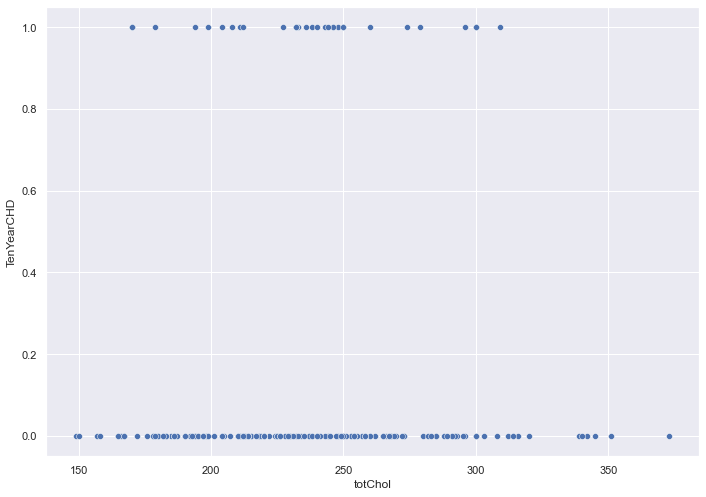

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=df_sample, x='totChol', y='TenYearCHD')

# Third Experimental question - Does BMI (X) change between gender (Y)

let's look on the mean to have a 'feel'

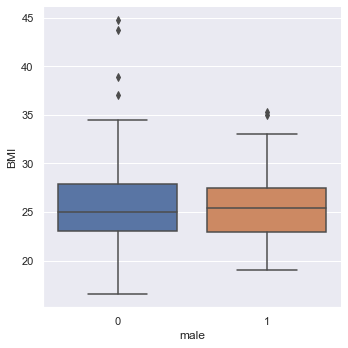

In [22]:
sns.catplot(data=df_sample, y='BMI', x='male', kind='box')